**<font color = black size=6>实验四:模型评估</font>**

**<font color = blue size=4>第一部分:数据集划分</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
import random
warnings.filterwarnings('ignore')

<span style="color:purple">给定一个完整的数据集，尚未划分训练集和测试集，我们需要手动实现训练集和测试集的划分:</span>

<span style="color:purple">我们继续使用iris数据集(iris.csv)，这次我们引入了具有4个特征 (花萼长度($x_1$)，花萼宽度 ($x_2$),花瓣长度 ($x_3$),花瓣宽度 ($x_4$))和两个标签 (Setosa，Versicolour)的100个样本数据，其中每类标签的样本占50%。我们需要将其划分为训练集和测试集，其中测试集中的样本数量占总数量的30%(也就是30个)，且测试集中每个标签的样本各占50%</span>

<span style="color:purple">1) 留出法</span>

<span style="color:purple">我们通过随机选择样本的方式将数据分割为训练集和测试集，并保持两种标签的数据的数量一致</span>

In [2]:
#通过pandas将csv文件转换为dataframe格式后进行操作
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值 
# map() 函数用于映射字典，将 'Species' 字符串类别转换为数值
# {'setosa': 0, 'virginica': 1} 进行映射
# .fillna(-1) 处理不在字典中的类别，填充为 -1，防止出现 NaN 值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1] #df.iloc[:, :-1] 选取所有行的前 n-1 列（特征）
labels = df.iloc[:, -1]# df.iloc[:, -1] 选取所有行的最后一列（标签）

# 计算每个类别需要分配给测试集的样本数量的比例，假设为 30%
test_ratio = 0.3

# 计算每个类别需要分配给测试集的样本数量
# `labels.value_counts()` 计算每个类别的样本总数
# `test_ratio` 乘以样本总数，计算需要抽取的测试样本数量
# `.astype(int)` 确保结果为整数
test_samples_per_class = (labels.value_counts() * test_ratio).astype(int)

# 打印测试集的样本数量
print("test_samples_per_class: ", test_samples_per_class)

# 初始化测试集和训练集
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# 根据标签的分布进行采样
for label, count in test_samples_per_class.items():
    # 从当前类别中随机抽取 `count` 个样本作为测试集
     # df[df['Species'] == label]：从DataFrame中选择‘Species’列为当前类别的所有行
    # .sample(n=count, random_state=42)：随机抽样，选取count个样本，random_state保证结果可重复
    class_samples = df[df['Species'] == label].sample(n=count, random_state=42)
    # 将抽取的样本添加到测试集
    test_data = pd.concat([test_data, class_samples])
    # 将未被抽取的样本保留在训练集中
    # df[df['Species'] == label]：选取当前类别的所有样本
    # .drop(class_samples.index)：删除已被抽取的样本，使剩下的作为训练集
    train_data = pd.concat([train_data, df[df['Species'] == label].drop(class_samples.index)])

# # 获取训练集和测试集的特征和标签
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1]

# # 打印训练集和测试集大小
print("Train data number: ", len(train_data))
print("Test data number: ", len(test_data))

# #打印训练集和测试集
print("Train data : ", np.array(train_data))
print("Test data : ", np.array(test_data))

test_samples_per_class:  Species
0    15
1    15
Name: count, dtype: int32
Train data number:  70
Test data number:  30
Train data :  [[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [5.1 3.8 1.9 0.4 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [4.6 3.2 1.4 0.2 0. ]
 [5.  3.3 1.4 0.2 0. ]
 [6.3 3.3 6.  2.5 1. ]
 [5.8 2.7 5.1 1.9 1. ]
 [7.1 3.  5.9 2

<span style="color:purple">2) 交叉验证法</span>

<span style="color:purple">我们将数据集分割为k个大小相等且标签数量类似的子数据集，每个迭代中选取一个子数据集作为测试集，剩余k-1个组成训练集，并保持两种标签的数据的数量一致</span>

In [29]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 将数据按照标签分为两类
class_0_samples = df[df['Species'] == 0]
class_1_samples = df[df['Species'] == 1]

# sample() 随机打乱数据
# frac=1 表示返回整个数据集
# random_state=42 设置随机种子，保证每次打乱的顺序一致（可复现）
class_0_samples = class_0_samples.sample(frac=1, random_state=42)
class_1_samples = class_1_samples.sample(frac=1, random_state=42)

# 进行 k 折交叉验证
k = 5

# 初始化训练集和测试集的列表
train_data = []
test_data = []

for i in range(k):
    # 初始化当前折的训练集和测试集
    train_fold = pd.DataFrame()
    test_fold = pd.DataFrame()

    # 计算当前折中每个类别的样本数量 `//` 代表整除，确保均匀分割数据
    class_0_fold_size = len(class_0_samples) // k
    class_1_fold_size = len(class_1_samples) // k
    

    # 添加当前折中每个类别的样本到测试集 
    # i * class_0_fold_size 到 (i + 1) * class_0_fold_size 选取当前折的数据
    test_fold = pd.concat([test_fold, class_0_samples[i * class_0_fold_size: (i + 1) * class_0_fold_size]])
    test_fold = pd.concat([test_fold, class_1_samples[i * class_1_fold_size: (i + 1) * class_1_fold_size]])
    
    # 训练集：从原数据集中删除测试集部分
    # drop() 根据 test_fold.index 删除对应索引的数据，得到训练集
    train_fold = df.drop(test_fold.index)

    # 再次打乱训练集和测试集
    train_fold = train_fold.sample(frac=1, random_state=42)
    test_fold = test_fold.sample(frac=1, random_state=42)

    # 将当前折的训练集和测试集添加到列表
    train_data.append(train_fold)
    test_data.append(test_fold)

# 打印每一折的测试集索引，可以看到均为不重复样本
for i in range(k):
    print("第", i+1, "折的测试集: ", (test_data[i].index))


第 1 折的测试集:  Int64Index([13, 75, 98, 39, 32, 48, 89, 45, 82, 76, 95, 30, 19, 69, 17, 80, 25,
            63, 67, 26],
           dtype='int64')
第 2 折的测试集:  Int64Index([12, 96, 56, 4, 47, 6, 54, 8, 97, 91, 58, 37, 15, 65, 3, 87, 46, 62,
            53, 41],
           dtype='int64')
第 3 折的测试集:  Int64Index([9, 77, 50, 16, 33, 0, 66, 34, 83, 94, 84, 24, 5, 55, 31, 74, 27,
            59, 81, 44],
           dtype='int64')
第 4 折的测试集:  Int64Index([29, 85, 52, 11, 23, 2, 61, 1, 73, 93, 51, 36, 40, 90, 21, 86, 35,
            79, 71, 43],
           dtype='int64')
第 5 折的测试集:  Int64Index([10, 64, 57, 22, 28, 7, 72, 49, 78, 92, 99, 18, 38, 88, 20, 68, 14,
            60, 70, 42],
           dtype='int64')


**<font color = blue size=4>第二部分:性能度量</font>**

<span style="color:purple">1) 回归任务:</span>

<span style="color:purple">均方误差(MSE): 计算模型的预测 $\hat{Y}$ 与真实标签 $Y$ 的接近程度</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\},其中$x_i$为样本$i$的特征值,$y_i$为样本$i$的标签值, $f$为训练的模型,该模型$f$在$D$的均方误差为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{(f(x_i)-y_i)^2}$$

<span style="color:purple">2)分类任务:</span>

<span style="color:purple">2.1)错误率: 分类错误样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本$i$的预测标签, 该模型$f$在$D$的错误率为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{\mathbb{I}(f(x_i)\neq y_i)}$$

<span style="color:purple">2.2)精确率: 分类正确样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签, 该模型$f$在$D$的精度为$$acc(f;D) = \frac{1}{m}\sum_{i=1}^{m}{\mathbb{I}(f(x_i) = y_i)} = 1 - E(f;D)$$

<span style="color:purple">2.3)查准率和查全率: 正例被预测出来的比率和预测出来的正例中正确的比率</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签.

我们假定该类样本中label为1(正例)和0(反例):

TP(真正例):$$\sum_{i=1}^{m}{\mathbb{I}(y_i=1 \quad \&\&\quad (f(x_i)= y_i))},$$

FN(假反例):$$\sum_{i=1}^{m}{\mathbb{I}(y_i=1 \quad \&\&\quad (f(x_i)\neq y_i))},$$

FP(假正例):$$\sum_{i=1}^{m}{\mathbb{I}(y_i=0 \quad \&\&\quad (f(x_i)\neq y_i))},$$

其中查准率(precision):$$P=\frac{TP}{TP+FP},$$

查全率(recall):$$R=\frac{TP}{TP+FN},$$

<span style="color:purple">2.4)P-R曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，则可以得到查准率-查全率曲线</span>

我们记一个样本为正例的可能性为$P(y=1|x;w)$，假如$P(y=1|x;w)$超过某个【阈值】，我们就预测这个样本是正例，否则预测它为反例：
$$\hat{y}=\begin{cases}
    1,&P(y=1|x;w)\ge Threshold,\\
    0,&Otherwise.
\end{cases}$$

下面，我们计算出所有样本的正例可能性:$P(y=1|x_i;w)$,并进行排序，我们便得到了一组正例可能性$[P(y=1|x_1;w),P(y=1|x_2;w),...,P(y=1|x_n;w)]$。我们可以将其中的每一个元素都作为【阈值】，那么每采用一个不同的阈值来预测整个数据集，我们就会得到一组不同的查准率-查全率，即一个不同的坐标点(recall,precision)。

记录每个坐标点(recall,precision)的F1度量: $$F1 = \frac{2*P*R}{P+R}$$

最后将得到的所有(recall,precision)画成折线图

给出一个简易的折线图的画图例子

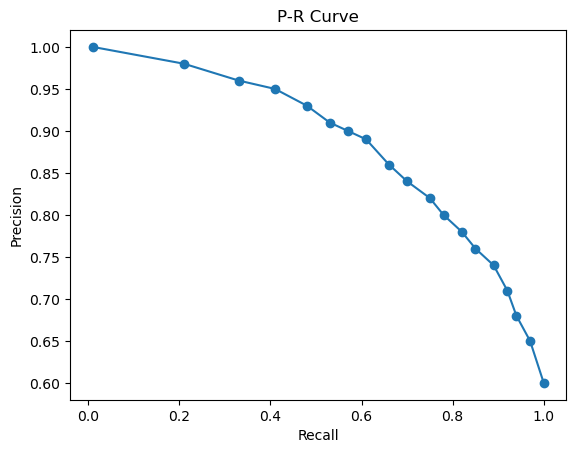

In [5]:
thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
recall     = [1.00, 0.97, 0.94, 0.92, 0.89, 0.85, 0.82, 0.78, 0.75, 0.70, 0.66, 0.61, 0.57, 0.53, 0.48, 0.41, 0.33, 0.21, 0.01]
precision  = [0.60, 0.65, 0.68, 0.71, 0.74, 0.76, 0.78, 0.80, 0.82, 0.84, 0.86, 0.89, 0.9, 0.91, 0.93, 0.95, 0.96, 0.98, 1.00]


plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P-R Curve')
plt.show()

<span style="color:purple">2.5)ROC曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，得到一组(FPR,TPR)，进而得到ROC曲线</span>

我们根据绘制P-R曲线同样的步骤，采用不同阈值来预测所有样本，但是以“假正例率”$FPR$为横轴，“真正例率”$TPR$（即查全率）为纵轴，便可以得到ROC曲线。

其中$$TPR=\frac{TP}{TP+FN},$$ $$FPR=\frac{FP}{TN+FP}.$$

下面给出一个绘制ROC曲线的例子。

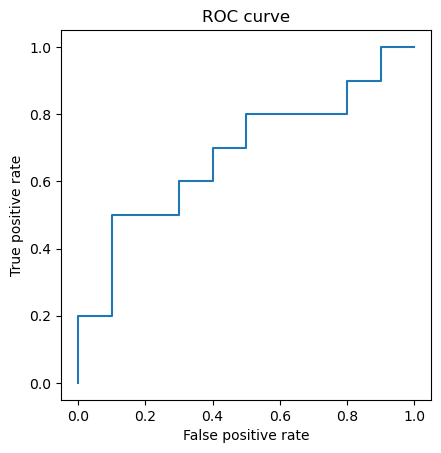

In [17]:

threshold = np.array([.9, .8, .7, .6, .55, .54, .53, .52, .51, .505, .4, .39, .38, .37, .36, .35, .34, .33, .3, .1])
fpr=np.array([0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 0.9, 1.0])
tpr=np.array([0.0, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0])

plt.plot(fpr, tpr)
plt.axis("square")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()

**<font color = blue size=4>第三部分:课堂实验</font>**

我们引入了一个骨科患者的生物力学特征数据集(illness.csv)，每个患者在数据集中由六个生物力学属性表示，这些属性分别为pelvic_incidence（盆腔发病率）、pelvic_tilt numeric（骨盆倾斜）、lumbar_lordosis_angle（腰椎前凸角）、sacral_slope（骶骨斜率）、pelvic_radius（骨盆桡骨）、pelvic_radius（脊椎滑脱分级), 对应的标签则为是否为椎间盘疝气和脊椎滑脱(normal和abnormal).

该数据集共有310个样本，但并没有划分训练集和测试集.

<span style="color:purple">1)导入数据集</span>

In [ ]:
#your code here
#通过pd.read_csv()读取数据
#将label标签内容从字符串替换成数值
#例如：
# df.map({"a": 0, "b": 1}) -> 0代表a ; 1代表b
# df.fillna(-1) 把NaN(缺失值)填充为 -1

<span style="color:purple">2)请分别使用两种数据划分方式(留出法、交叉验证法)划分出训练集和测试集</span>

In [ ]:
#留出法
#your code here
# 做题步骤：
# 1. 复制一份数据集
# 2. 获取特征和标签列
# 3. 设置样本数量比例
# 4. 计算分配给测试机的样本数
# 5. 初始化空的训练集和测试集
# 6. 进入循环抽样
#    a. 取出标签为当前类别的所有样本
#    b. 从这些样本中随机抽取 count 个作为测试样本
#    c. 将抽取的样本加入测试集
#    d. 把剩下的样本加入训练集
# 7. 分离训练集和测试集的特征与标签
# 8. 打印结果

#会用到的函数：
# df["name"].value_counts() 统计"name"这列数据分别出现的次数
# s.astype(int) 将字符串s转为整数int类型
# df.sample(3, random_state=1) 随机抽取3行
# df.append({"name": ["Spike"], "age": [25]}) 追加数据
# drop() 用来删除行或列



In [ ]:
#交叉验证法
#折数k可自行选择
#your code here
# 做题步骤：
# 1. 获取特征和标签列
# 2. 将数据按照标签分为两类
# 3. 将每一类别的样本随机排序
# 4. 设置 k 
# 5. 进入循环次数为 k ：
#    a. 初始化训练集和测试集的列表
#    b. 计算当前折中每个类别的样本数量
#    c. 添加当前折中每个类别的样本到测试集
#    d. 添加剩余样本到训练集
#    e. 打乱训练集和测试集的顺序，以便更好的随机性
#    f. 将当前折的训练集和测试集添加到列表
# 6. 打印结果

#会用到的函数
# len("Hello World") 计算长度



<span style="color:purple">3)请分别在两种数据划分方式(留出法、交叉验证法)所划分出训练集和测试集下训练一个逻辑回归模型,并测试错误率\精度</span>

In [ ]:
#留出法
#your code here

# 分离feature和label
# 取前 6 列，表示输入特征
# 取最后一列，表示输出标签

# 添加全1列

#初始化参数（学习率、迭代次数和权重）

# 批量梯度下降训练逻辑回归模型
# 进入循环更新参数 (最多 epochs 轮)：
#    a. 计算模型的线性输出：y=X⋅W
#    b. 进行 Sigmoid 运算：y=1/(1+e^{-z})
#    c. 更新权重：W:=W−η⋅(1/m)X^T(h(X)−Y)

# 输出最终权重

#会用到函数：
#np.ones(5) 创建一个长度为 5 数值为 1 的数组
#x = np.array([[1, 2],
              # [3, 4]])
# y = np.array([[5, 6],
#               [7, 8]])
#  np.concatenate((x, y), axis=1) 水平拼接（axis=1）
#输出结果：
# [[1 2 5 6]
#  [3 4 7 8]]






In [ ]:
#留出法测试精度
#your code here
#计算线性预测值：outcome=X(test)​⋅ w

#初始化预测列表

#进行 Sigmoid 运算

#将概率转为类别
#结果越接近 1 → 越可能是正类；越接近 0 → 越可能是负类

#计算预测精度
#遍历每个样本，若预测正确（预测类别 == 实际类别），acc 加 1
#精度=正确样本数(acc) / 总样本数

#输出与保存结果



In [ ]:
#交叉验证法
#your code here
#每次选用一个子集作为测试集，剩余k-1个子集的并集作为训练集，所以需要每轮都进行测试
#可以使用最后k个轮次的精度的平均精度作为本方法的最终精度

#进入循环对每个fold的训练集和测试集都添加全1列
#    a. 把 DataFrame 转成 numpy 数组
#    b. 生成一列全 1
#    c. 把这列拼到样本前面
#    d. 拆分出特征和标签
#    e. 同样操作测试集

# 初始化参数

# 进入循环开始训练 (最多 epochs 轮)：
#    a. 计算线性部分y=X⋅ w
#    b. 对每个样本应用 sigmoid 函数
#    c. 更新权重参数
#    d. 计算线性预测值outcome
#    e. 然后通过 sigmoid 函数将其转换成概率
#    f. 将概率转成类别
#    g. 统计预测正确的样本数量
#    h. 在最后 5 次迭代时，计算并输出准确率

#输出平均测试精度

<span style="color:purple">4)按照错误率\精度的性能指标指出性能【最好】和性能【最差】的数据划分方式</span>

In [ ]:
#your code here
print("留出法精度:")
print("交叉验证法平均精度:")

<span style="color:purple">5)画出留出法对应的P-R曲线和ROC曲线,并求出相应点的F1度量</span>

In [2]:
#your code here
#拿到留出法的score和label
#将二维数组转换成一维数组

#把标签里的元素都强制转换为整数类型

#打印结果

#会用到的函数：
#a = np.array([[0.7], [0.3], [0.9]]) -> 输出: [0.7 0.3 0.9]
#a = [1.0, 0.0, 1.0]
#a = list(map(int, a)) -> 输出 [1, 0, 1]



In [ ]:
#your code here
#画出P-R曲线
def precision_recall_curve(score, label):
    # 将样本按照正例可能性从大到小排序

    # 按照上一步得到的排序顺序重排标签
    
    # 设置初始值 fn设为所有label=1样本的数量 tn设为所有label=0样本的数量
    
    # 依次将每个样例作为正例计算查准率和查全率并记录坐标点
    # 遍历排序后的样本，从高分到低分逐个“认为它是正例”
    #   a. 如果样本是真正例（label=1），则 tp 增 1，fn 减 1
    #   b. 如果样本是假正例（label=0），则 fp 增 1，tn 减 1
    #   c. Precision = TP / (TP + FP)，Recall（查全率） = TP / (TP + FN)，F1 = 2 × (Precision × Recall) / (Precision + Recall)
    #   d. 并将每个点存入列表

    # 返回 precision, recall, F1
    
    

#会用到的函数
# score = [0.2, 0.8, 0.5]
# sorted(range(3), key=lambda i: score[i], reverse=True) -> [1, 2, 0] 返回排序后样本的索引
# label = [0, 1, 1]
# sort_idx = [1, 2, 0] 
# sorted_label = [label[i] for i in sort_idx]->  [1, 1, 0]




In [ ]:
#your code here
#画出ROC曲线
def FPR_TPR_curve(score, label):
    # 将样本按照正例可能性从大到小排序

    
    # 依次将每个样例作为正例计算TPR和FPR并记录坐标点

    # 遍历排序后的样本
    #   a. 如果样本是真正例（label=1），则 tp 增 1，fn 减 1
    #   b. 如果样本是假正例（label=0），则 fp 增 1，tn 减 1
    #   c. P真正率（TPR） = TP / (TP + FN)，假正率（FPR） = FP / (TN + FP)
    #   d. 并将每个点存入列表

    #返回 TPR, FPR
    




**<font color = blue size=4>第四部分:作业提交</font>**

一、实验课下课前提交完成代码 
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、课堂课件获取地址：https://www.jianguoyun.com/p/Ddk4kPQQp5WhChiXwYcGIAA

实验内容获取地址：https://www.jianguoyun.com/p/DU3x7xAQp5WhChjh4IoGIAA